In [80]:
import pandas as pd 
import numpy as np

import os 

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["figure.figsize"] = (10,8)


In [14]:
path = "Data/Toronto/Processed"
data = []

for filename in os.listdir(path):
    if filename[:len("conflicts_version2")] == "conflicts_version2":
        data.append(pd.read_csv(path + "/" + filename))

In [82]:
tsne = TSNE(n_components=2, verbose=1,perplexity = 100, random_state=123)

sample = data[4]
sample.replace(np.NaN,0,inplace=True)
z = tsne.fit_transform(sample) 

c:\Users\jonah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jonah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5350 samples in 0.009s...
[t-SNE] Computed neighbors for 5350 samples in 1.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5350
[t-SNE] Computed conditional probabilities for sample 2000 / 5350
[t-SNE] Computed conditional probabilities for sample 3000 / 5350
[t-SNE] Computed conditional probabilities for sample 4000 / 5350
[t-SNE] Computed conditional probabilities for sample 5000 / 5350
[t-SNE] Computed conditional probabilities for sample 5350 / 5350
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.597237
[t-SNE] KL divergence after 1000 iterations: 1.071655


In [85]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


plot = df[df['comp-1']<-30]
plot = plot[plot['comp-2']<2]

Text(0, 0.5, 'Component 2')

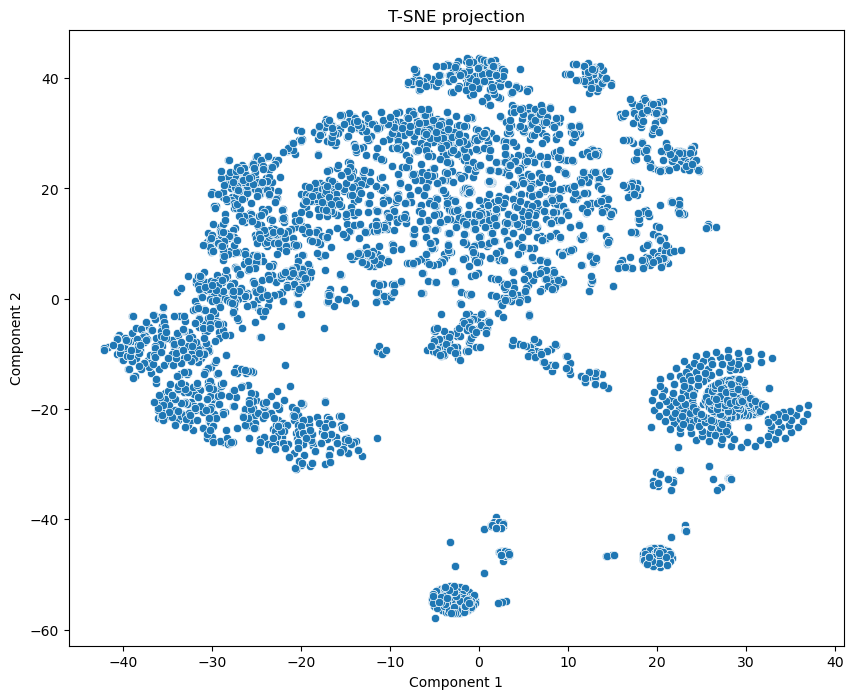

In [86]:
sns.scatterplot(x="comp-1", y="comp-2", 
                palette=sns.color_palette("hls", 3),
                data=df).set(title="T-SNE projection") 

plt.xlabel('Component 1')
plt.ylabel('Component 2')